Name: Siddhesh Bangar

Roll No: 712

Division: A

Group No: 2

DOP: 5/9/24

DOS:

Score:


# Experiment No 4: Perform exploratory data analysis and visualization of social media data for business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/Siddheshbangar03/Social-Media-Analytics-MaxFashionIndia-Dataset

Cloning into 'Social-Media-Analytics-MaxFashionIndia-Dataset'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 216.89 KiB | 4.09 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
Facebook = pd.read_csv("/content/Social-Media-Analytics-MaxFashionIndia-Dataset/SMA  Facebook Cleaning after Cleaning.csv")
Twitter = pd.read_csv("/content/Social-Media-Analytics-MaxFashionIndia-Dataset/SMA X Final Cleaning.csv")
Youtube = pd.read_csv("/content/Social-Media-Analytics-MaxFashionIndia-Dataset/SMA YT - Max India Fashion Final Combine after cleaning.csv")
Gmap = pd.read_csv("/content/Social-Media-Analytics-MaxFashionIndia-Dataset/SMA EXP 03 GMAP After Cleaning.csv")

# **Facebook Clean Data EDA & Visualization**

In [4]:
Facebook.head()

,postId,url,time,text,likes,shares,comments,isVideo,viewsCount
0,915698507258512,https://www.facebook.com/maxfashions/posts/pfb...,2024-09-04T12:34:21.000Z,get groove print speak geometry ready score st...,9,0,NaN,False,NaN
1,914321584062871,https://www.facebook.com/maxfashions/posts/pfb...,2024-09-02T12:30:18.000Z,ever got head cloud foot coziest knitwear need...,12,0,2.0,False,NaN
2,913001854194844,https://www.facebook.com/maxfashions/posts/pfb...,2024-08-31T12:30:28.000Z,brb way grab super fly coords max fashion catc...,13,0,1.0,False,NaN
3,911695237658839,https://www.facebook.com/maxfashions/posts/pfb...,2024-08-29T12:55:22.000Z,roomy relaxed ready make statement meet new go...,22,0,5.0,False,NaN
4,910388534456176,https://www.facebook.com/reel/3831115240494704/,2024-08-27T12:36:12.000Z,nothing see week going far favorite monochrome...,23,0,5.0,True,1474.0


In [5]:
Facebook.describe()

,postId,likes,shares,comments,viewsCount
count,5.000000e+02,500.00000,500.000000,417.000000,3.060000e+02
mean,7.689728e+14,1595.79200,2.970000,7.657074,6.851920e+04
std,8.562195e+13,4147.99598,5.951802,15.176364,1.717424e+05
min,6.195286e+14,7.00000,0.000000,1.000000,4.860000e+02
25%,6.911343e+14,29.00000,0.000000,2.000000,1.278000e+03
50%,7.624156e+14,65.50000,1.000000,4.000000,2.163000e+03
75%,8.488790e+14,298.50000,3.250000,7.000000,6.488000e+04
max,9.156985e+14,33609.00000,88.000000,162.000000,1.200407e+06


In [6]:
Facebook.isnull().sum()

,0
postId,0
url,0
time,0
text,15
likes,0
shares,0
comments,83
isVideo,0
viewsCount,194


In [7]:
Facebook.dtypes

,0
postId,int64
url,object
time,object
text,object
likes,int64
shares,int64
comments,float64
isVideo,bool
viewsCount,float64


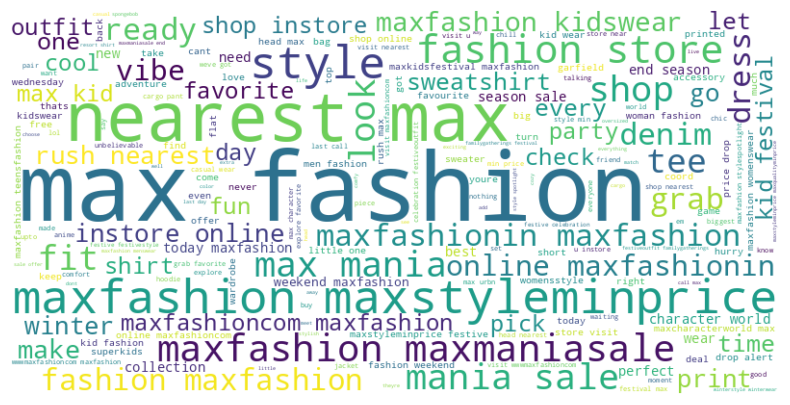

In [8]:
from wordcloud import WordCloud

text = ' '.join(Facebook['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

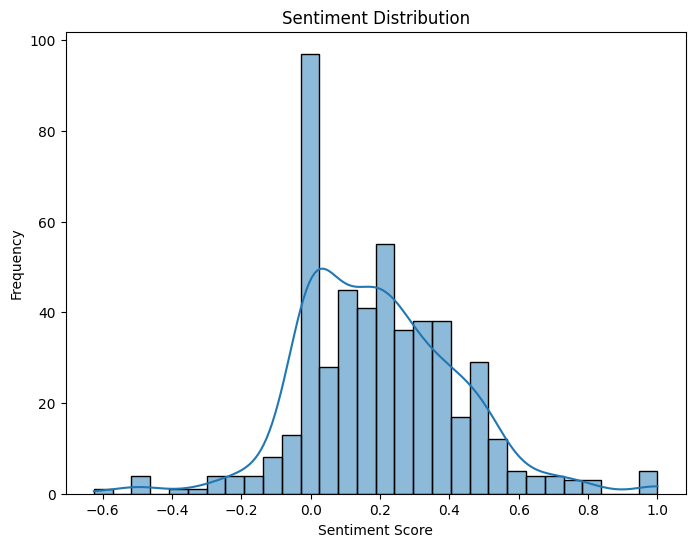

In [9]:
from textblob import TextBlob

# Replace NaN values and non-string values in the 'text' column with an empty string
Facebook['text'] = Facebook['text'].astype(str)

# Apply sentiment analysis
Facebook['sentiment'] = Facebook['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(Facebook['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


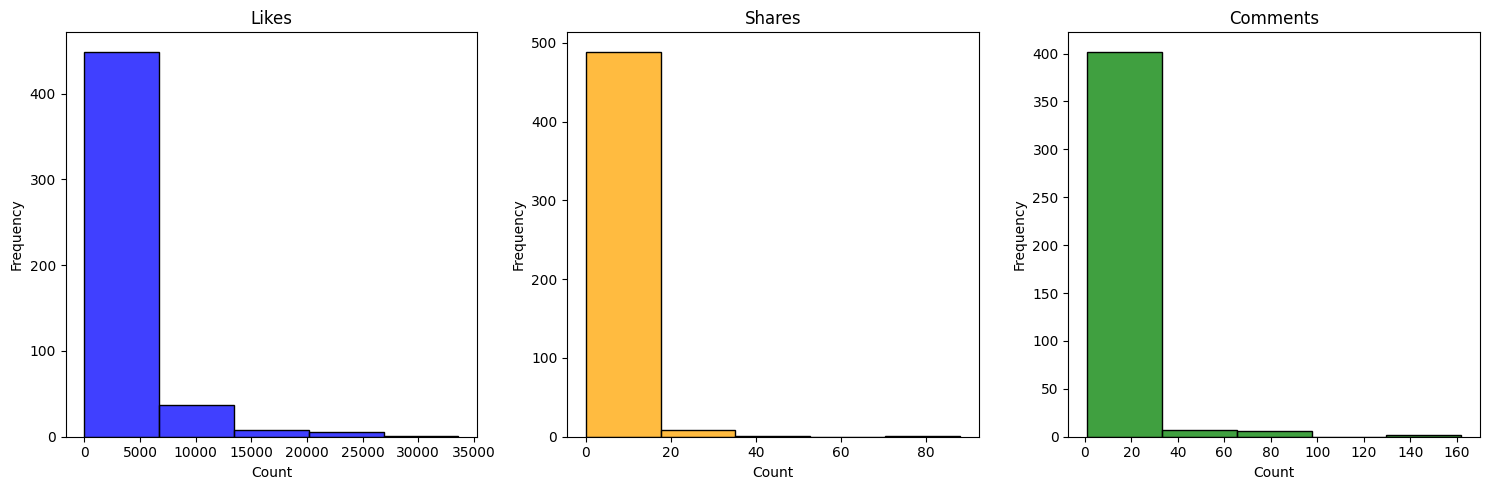

In [10]:
# Create subplots for likes, shares, and comments
plt.figure(figsize=(15, 5))

# Plot for Likes
plt.subplot(1, 3, 1)
sns.histplot(Facebook['likes'], bins=5, kde=False, color='blue')
plt.title('Likes')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Plot for Shares
plt.subplot(1, 3, 2)
sns.histplot(Facebook['shares'], bins=5, kde=False, color='orange')
plt.title('Shares')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Plot for Comments
plt.subplot(1, 3, 3)
sns.histplot(Facebook['comments'], bins=5, kde=False, color='green')
plt.title('Comments')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


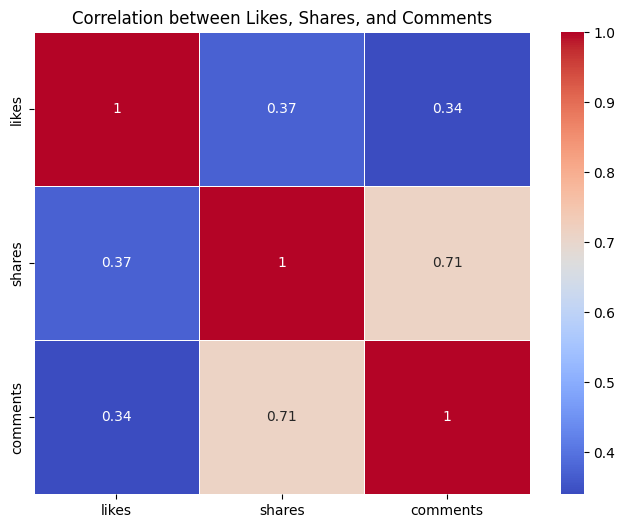

In [11]:
# Correlation between Likes, Shares, and Comments
plt.figure(figsize=(8, 6))
correlation = Facebook[['likes', 'shares', 'comments']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Likes, Shares, and Comments')
plt.show()

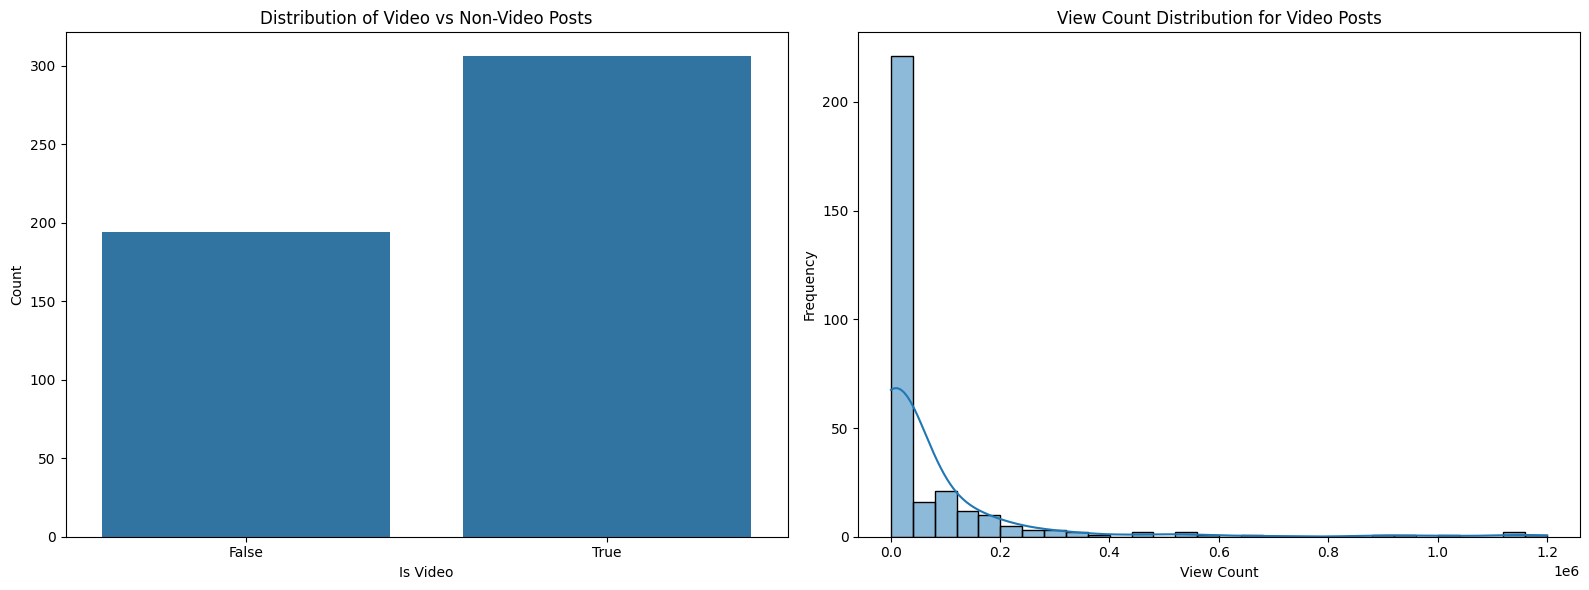

In [12]:
# Create a figure with 1 row and 2 columns for side-by-side plots
plt.figure(figsize=(16, 6))

# Distribution of Video vs Non-Video Posts
plt.subplot(1, 2, 1)
sns.countplot(x='isVideo', data=Facebook)
plt.title('Distribution of Video vs Non-Video Posts')
plt.xlabel('Is Video')
plt.ylabel('Count')

# View Count Distribution for Video Posts
video_posts = Facebook[Facebook['isVideo'] == True]
plt.subplot(1, 2, 2)
sns.histplot(video_posts['viewsCount'], bins=30, kde=True)
plt.title('View Count Distribution for Video Posts')
plt.xlabel('View Count')
plt.ylabel('Frequency')

# Adjust the layout so the plots don't overlap
plt.tight_layout()
plt.show()


# **X Clean EDA & Visulization**

In [17]:
Twitter.head()

,link,text,user,likes,quotes,retweets,comments
0,https://twitter.com/maxfashionindia/status/183...,ever got head cloud foot coziest knitwear need...,Max Fashion India,1,0,0,3
1,https://twitter.com/maxfashionindia/status/182...,brb way grab super fly coords max fashion catc...,Max Fashion India,2,0,0,2
2,https://twitter.com/maxfashionindia/status/182...,roomy relaxed ready make statement meet new go...,Max Fashion India,1,0,0,2
3,https://twitter.com/maxfashionindia/status/182...,wearable art alert japanese art street twistbe...,Max Fashion India,5,0,0,1
4,https://twitter.com/maxfashionindia/status/182...,nobody remember salary busy u many hour u work...,Max Fashion India,4,1,3,2


In [16]:
Twitter.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
Twitter.describe()

,likes,quotes,retweets,comments
count,100.000000,100.000000,100.000000,100.000000
mean,8.920000,1.950000,3.990000,8.230000
std,19.808518,15.933812,16.662724,35.805269
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000
50%,5.000000,0.000000,1.000000,2.000000
75%,8.000000,0.000000,2.000000,5.000000
max,191.000000,159.000000,153.000000,312.000000


In [19]:
Twitter.isnull().sum()

,0
link,0
text,0
user,0
likes,0
quotes,0
retweets,0
comments,0


In [20]:
Twitter.dtypes

,0
link,object
text,object
user,object
likes,int64
quotes,int64
retweets,int64
comments,int64


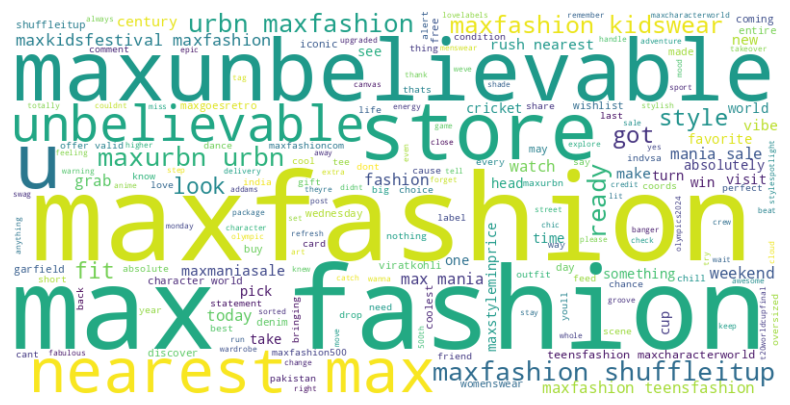

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text data
text = " ".join(Twitter['text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


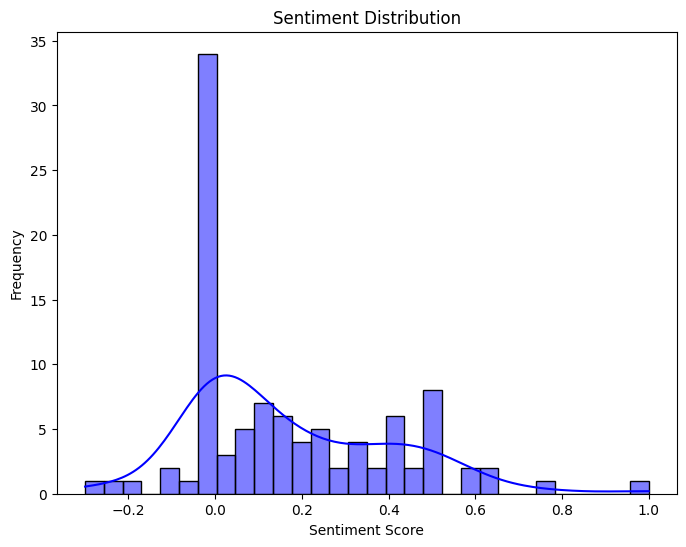

In [22]:
from textblob import TextBlob

Twitter['text'] = Twitter['text'].astype(str)

# Apply sentiment analysis
Twitter['sentiment'] = Twitter['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(Twitter['sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


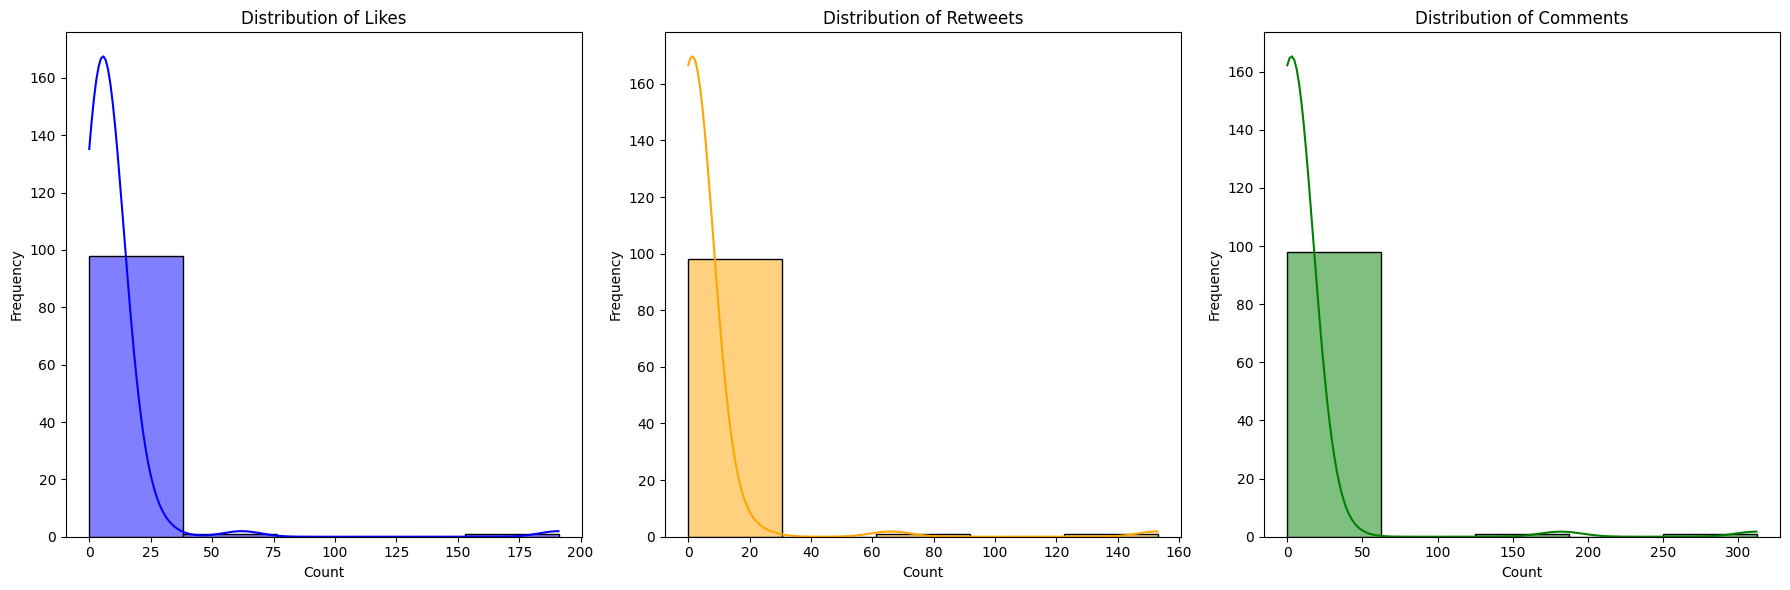

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for subplots
plt.figure(figsize=(18, 6))

# Plot Likes distribution
plt.subplot(1, 3, 1)
sns.histplot(Twitter['likes'], bins=5, kde=True, color='blue')
plt.title('Distribution of Likes')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Plot Shares distribution
plt.subplot(1, 3, 2)
sns.histplot(Twitter['retweets'], bins=5, kde=True, color='orange')
plt.title('Distribution of Retweets')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Plot Comments distribution
plt.subplot(1, 3, 3)
sns.histplot(Twitter['comments'], bins=5, kde=True, color='green')
plt.title('Distribution of Comments')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


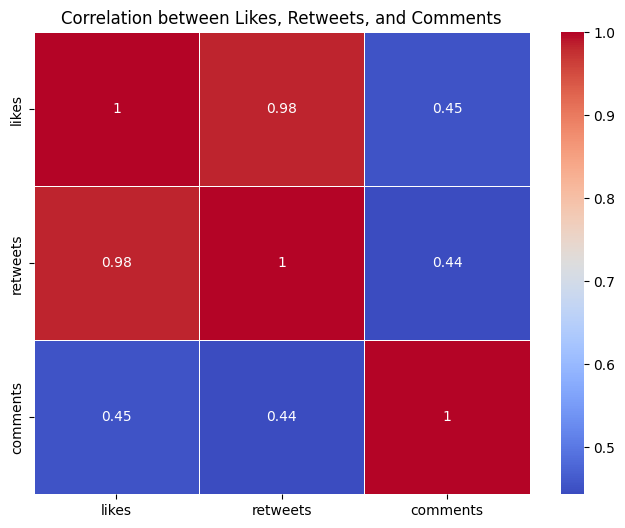

In [25]:
# Correlation between Likes, Retweets, and Comments
plt.figure(figsize=(8, 6))
correlation = Twitter[['likes', 'retweets', 'comments']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Likes, Retweets, and Comments')
plt.show()

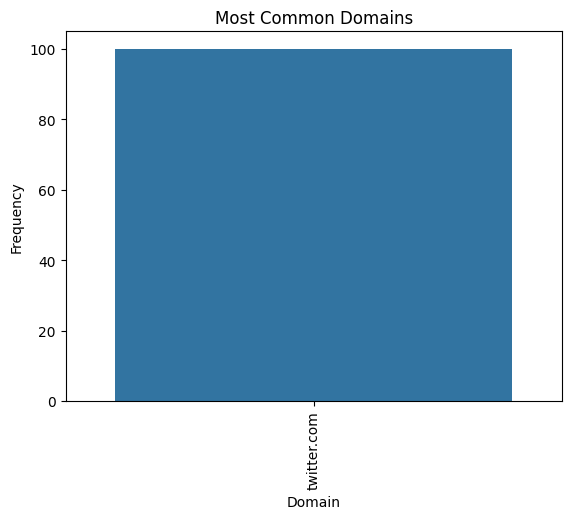

In [26]:
from urllib.parse import urlparse

# Extract domain from link
Twitter['domain'] = Twitter['link'].apply(lambda x: urlparse(x).netloc)

# Count the frequency of each domain
domain_counts = Twitter['domain'].value_counts()

# Bar plot of domain frequency
sns.barplot(x=domain_counts.index, y=domain_counts.values)
plt.title('Most Common Domains')
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


## **YouTube Clean Data EDA & Visulization**

In [29]:
Youtube.head()

,video_url,video_id,title,tags,view_count,likes,description,duration,topic_categories,date,time,published_at,channel_id,channel_title
0,https://www.youtube.com/watch?v=zKCPoGAr_-w,zKCPoGAr_-w,lounge mode make stylish,NaN,21,2.0,lounge coords covered pm head max fashion expl...,00:26,"https://en.wikipedia.org/wiki/Fashion, https:/...",20-08-2024,12:26,NaN,NaN,NaN
1,https://www.youtube.com/watch?v=KqUL3AOGABM,KqUL3AOGABM,cozy handle fly ignore,NaN,31,2.0,cozy handle fly ignore style spotlight august ...,00:31,"https://en.wikipedia.org/wiki/Fashion, https:/...",19-08-2024,12:50,NaN,NaN,NaN
2,https://www.youtube.com/watch?v=xCqTfep-K6M,xCqTfep-K6M,life lesson otg ft alayaf,NaN,93,4.0,life lesson otg ft alayaf afxmaxurbn maxurbn m...,00:15,https://en.wikipedia.org/wiki/Lifestyle_(socio...,18-08-2024,12:30,NaN,NaN,NaN
3,https://www.youtube.com/watch?v=KGTX-dg0i0o,KGTX-dg0i0o,last chance win free gift voucher worth 500 today,NaN,10,1.0,last chance win free gift voucher worth 500 to...,00:16,"https://en.wikipedia.org/wiki/Fashion, https:/...",18-08-2024,04:30,NaN,NaN,NaN
4,https://www.youtube.com/watch?v=qqYD4Y3GW_o,qqYD4Y3GW_o,slide smoothest gift card town bet sibling gon...,NaN,138,7.0,slide smoothest gift card town bet sibling gon...,00:14,"https://en.wikipedia.org/wiki/Fashion, https:/...",17-08-2024,12:00,NaN,NaN,NaN


In [28]:
Youtube.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
Youtube.describe()

,view_count,likes
count,9.400000e+02,910.000000
mean,4.497419e+05,115.347253
std,2.615143e+06,1532.648589
min,0.000000e+00,0.000000
25%,1.787500e+02,2.000000
50%,9.430000e+02,8.000000
75%,1.643600e+04,24.000000
max,4.050613e+07,43954.000000


In [31]:
Youtube.isnull().sum()

,0
video_url,0
video_id,0
title,2
tags,624
view_count,0
likes,30
description,192
duration,0
topic_categories,16
date,205


In [32]:
Youtube.dtypes

,0
video_url,object
video_id,object
title,object
tags,object
view_count,int64
likes,float64
description,object
duration,object
topic_categories,object
date,object


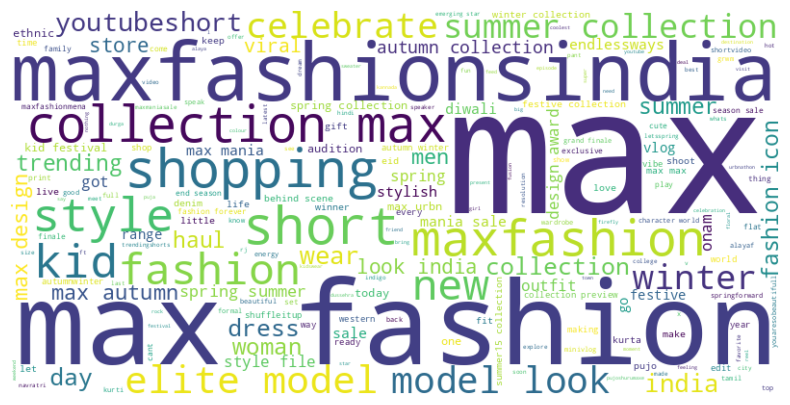

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text data
text = " ".join(Youtube['title'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

view_count
93        5
29        5
27        5
88        5
48        4
         ..
955318    1
585039    1
10337     1
337921    1
506       1
Name: count, Length: 789, dtype: int64


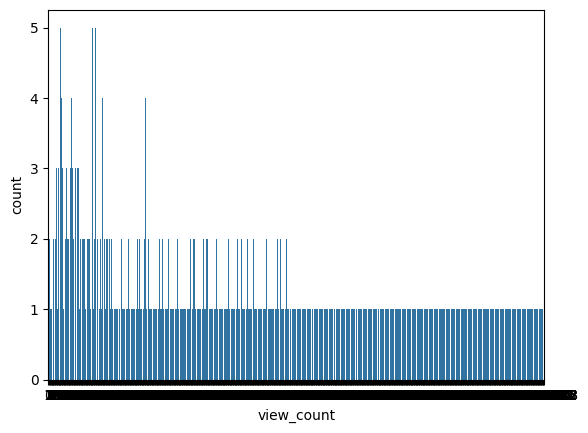

In [34]:
# Frequency of categories
print(Youtube['view_count'].value_counts())

# Plotting the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='view_count', data=Youtube)
plt.show()

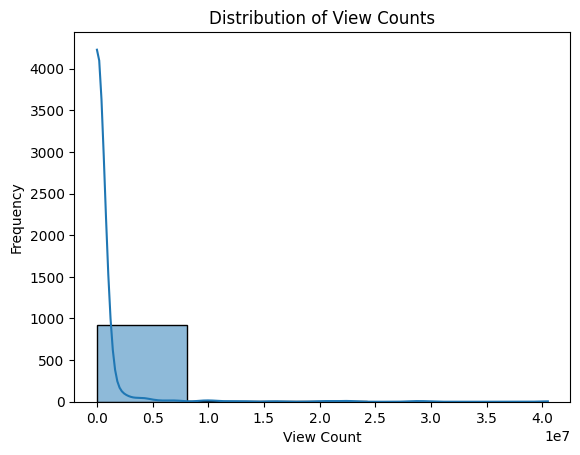

In [35]:
sns.histplot(Youtube['view_count'], bins=5, kde=True)
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

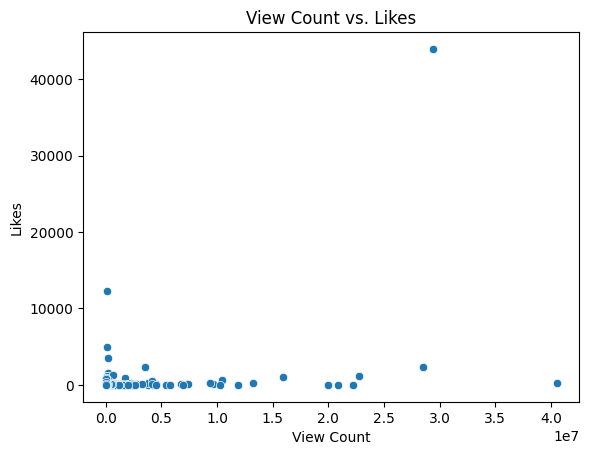

In [36]:
sns.scatterplot(data=Youtube, x='view_count', y='likes')
plt.title('View Count vs. Likes')
plt.xlabel('View Count')
plt.ylabel('Likes')
plt.show()

<ipython-input-37-0067360c40d0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')


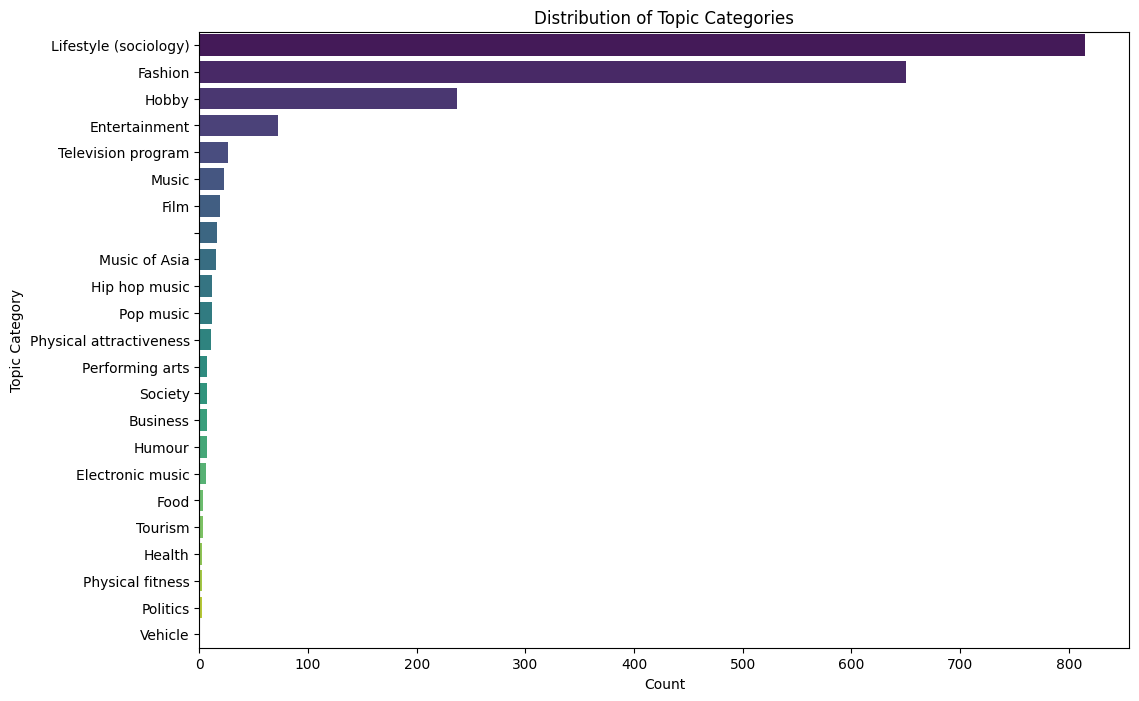

In [37]:
# Function to extract the category name from URL
def extract_category(url):
    return url.split('/')[-1].replace('_', ' ')

# Replace NaN with empty string and convert to string type
Youtube['topic_categories'] = Youtube['topic_categories'].fillna('').astype(str)

# Apply the function to the 'topic_categories' column
Youtube['topic_categories_clean'] = Youtube['topic_categories'].apply(
    lambda x: ', '.join([extract_category(part) for part in x.split(',')])
)

# Split the cleaned categories into separate rows
categories_split = Youtube['topic_categories_clean'].str.split(', ', expand=True).stack()
categories_split = categories_split.reset_index(drop=True)

# Count occurrences of each category
category_counts = categories_split.value_counts()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')
plt.title('Distribution of Topic Categories')
plt.xlabel('Count')
plt.ylabel('Topic Category')
plt.show()


In [38]:
Youtube['topic_categories_clean'].unique()

array(['Fashion, Hobby, Lifestyle (sociology)',
       'Fashion, Lifestyle (sociology)', 'Lifestyle (sociology)', '',
       'Entertainment, Pop music', 'Entertainment', 'Fashion',
       'Hip hop music, Lifestyle (sociology)',
       'Entertainment, Hip hop music',
       'Fashion, Lifestyle (sociology), Pop music',
       'Electronic music, Hip hop music, Music, Pop music',
       'Hip hop music, Music', 'Music',
       'Electronic music, Hip hop music, Music, Music of Asia, Pop music',
       'Fashion, Hip hop music, Music, Pop music', 'Health',
       'Entertainment, Film', 'Lifestyle (sociology), Pop music',
       'Hobby, Lifestyle (sociology)',
       'Electronic music, Lifestyle (sociology), Pop music',
       'Entertainment, Fashion', 'Entertainment, Performing arts',
       'Hobby, Lifestyle (sociology), Music of Asia', 'Society',
       'Music, Music of Asia', 'Fashion, Music, Music of Asia',
       'Entertainment, Film, Television program',
       'Food, Lifestyle (sociolog

## **Gmap Eda and Visualization**

In [40]:
Gmap.head()

,rank,searchPageUrl,title,categoryName,address,street,city,postalCode,website,phone,locatedIn,totalScore,reviewsCount
0,5,https://www.google.com/maps/search/Max%20Fashi...,Max Collection,Men's clothing store,"Shop No 17, Park Site, Godrej Hillside Colony,...","Shop No 17, Park Site",Mumbai,400079,NaN,+91 97024 72050,NaN,NaN,0
1,8,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"BN Agarwal Commercial Complex, 1st & 2nd Flr, ...","BN Agarwal Commercial Complex, 1st & 2nd Flr, ...",Mumbai,400057,https://stores.maxfashion.in/max-vile-parle-ea...,+91 22 2614 0138,Parle Square Mall,4.1,2087
2,5,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"Lower Ground Floor, City Mall Phoneix Market, ...","Lower Ground Floor, City Mall Phoneix Market, ...",Mumbai,400070,https://stores.maxfashion.in/max-kamani-shoppi...,+91 22 6180 1267,Phoenix Marketcity,4.2,2030
3,5,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"1st Floor, Infiniti Mall, Phase D, Oshiwara, A...","1st Floor, Infiniti Mall",Mumbai,400053,https://stores.maxfashion.in/max-andheri-west-...,+91 77382 82421,NaN,5.0,1
4,4,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"Unit No SF201A, 1st Floor, Infiniti Mall, New ...","Unit No SF201A, 1st Floor, Infiniti Mall, New ...",Mumbai,400064,https://stores.maxfashion.in/max-malad-west-sh...,+91 22 4972 4170,Infiniti Mall,4.1,2760


In [41]:
Gmap

,rank,searchPageUrl,title,categoryName,address,street,city,postalCode,website,phone,locatedIn,totalScore,reviewsCount
0,5,https://www.google.com/maps/search/Max%20Fashi...,Max Collection,Men's clothing store,"Shop No 17, Park Site, Godrej Hillside Colony,...","Shop No 17, Park Site",Mumbai,400079,NaN,+91 97024 72050,NaN,NaN,0
1,8,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"BN Agarwal Commercial Complex, 1st & 2nd Flr, ...","BN Agarwal Commercial Complex, 1st & 2nd Flr, ...",Mumbai,400057,https://stores.maxfashion.in/max-vile-parle-ea...,+91 22 2614 0138,Parle Square Mall,4.1,2087
2,5,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"Lower Ground Floor, City Mall Phoneix Market, ...","Lower Ground Floor, City Mall Phoneix Market, ...",Mumbai,400070,https://stores.maxfashion.in/max-kamani-shoppi...,+91 22 6180 1267,Phoenix Marketcity,4.2,2030
3,5,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"1st Floor, Infiniti Mall, Phase D, Oshiwara, A...","1st Floor, Infiniti Mall",Mumbai,400053,https://stores.maxfashion.in/max-andheri-west-...,+91 77382 82421,NaN,5.0,1
4,4,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"Unit No SF201A, 1st Floor, Infiniti Mall, New ...","Unit No SF201A, 1st Floor, Infiniti Mall, New ...",Mumbai,400064,https://stores.maxfashion.in/max-malad-west-sh...,+91 22 4972 4170,Infiniti Mall,4.1,2760
5,3,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"Phase 2, Max Retail Devision, No F 39, 1st Flo...","Phase 2, Max Retail Devision, No F 39, 1st Flo...",Mumbai,400086,https://stores.maxfashion.in/max-lbs-road-shop...,+91 22 2517 1278,R CITY,4.1,3232
6,1,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"Mulund Thane Checknaka, 1st Floor, R Mall, Mul...","Mulund Thane Checknaka, 1st Floor, R Mall",Mumbai,400080,https://stores.maxfashion.in/max-qrs-retail-pv...,+91 22 4158 2200,"R Mall, Mulund",4.1,1249
7,1,https://www.google.com/maps/search/Max%20Fashi...,Max,Shopping mall,"1st & 2nd Flr, Growels 101 Mall Western Expres...","1st & 2nd Flr, Growels 101 Mall Western Expres...",Mumbai,400101,https://stores.maxfashion.in/max-samata-ngr-sh...,+91 22 6708 6006,Growel's 101 Mall,4.0,94


In [42]:
Gmap.describe()

,rank,postalCode,totalScore,reviewsCount
count,8.000000,8.000000,7.000000,8.000000
mean,4.000000,400073.750000,4.228571,1431.625000
std,2.329929,15.944099,0.345033,1293.518451
min,1.000000,400053.000000,4.000000,0.000000
25%,2.500000,400062.250000,4.100000,70.750000
50%,4.500000,400074.500000,4.100000,1639.500000
75%,5.000000,400081.500000,4.150000,2255.250000
max,8.000000,400101.000000,5.000000,3232.000000


In [43]:
Gmap.dtypes

,0
rank,int64
searchPageUrl,object
title,object
categoryName,object
address,object
street,object
city,object
postalCode,int64
website,object
phone,object


In [44]:
Gmap.isnull().sum()

,0
rank,0
searchPageUrl,0
title,0
categoryName,0
address,0
street,0
city,0
postalCode,0
website,1
phone,0


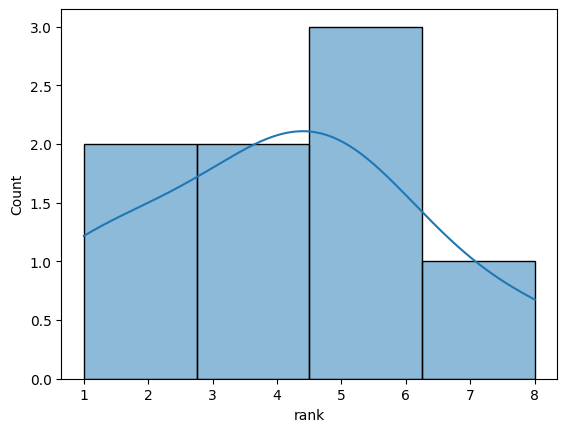

In [46]:
sns.histplot(Gmap['rank'], kde=True)
plt.show()

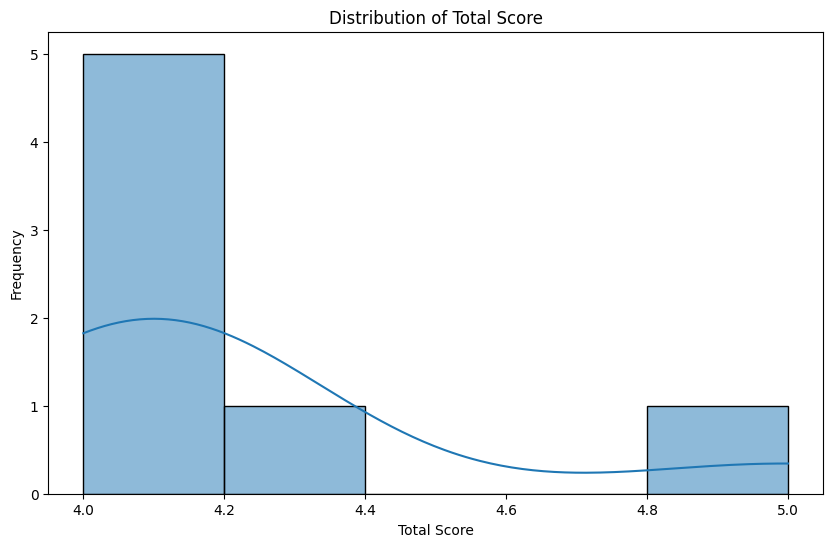

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(Gmap['totalScore'].dropna(), bins=5, kde=True)
plt.title('Distribution of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

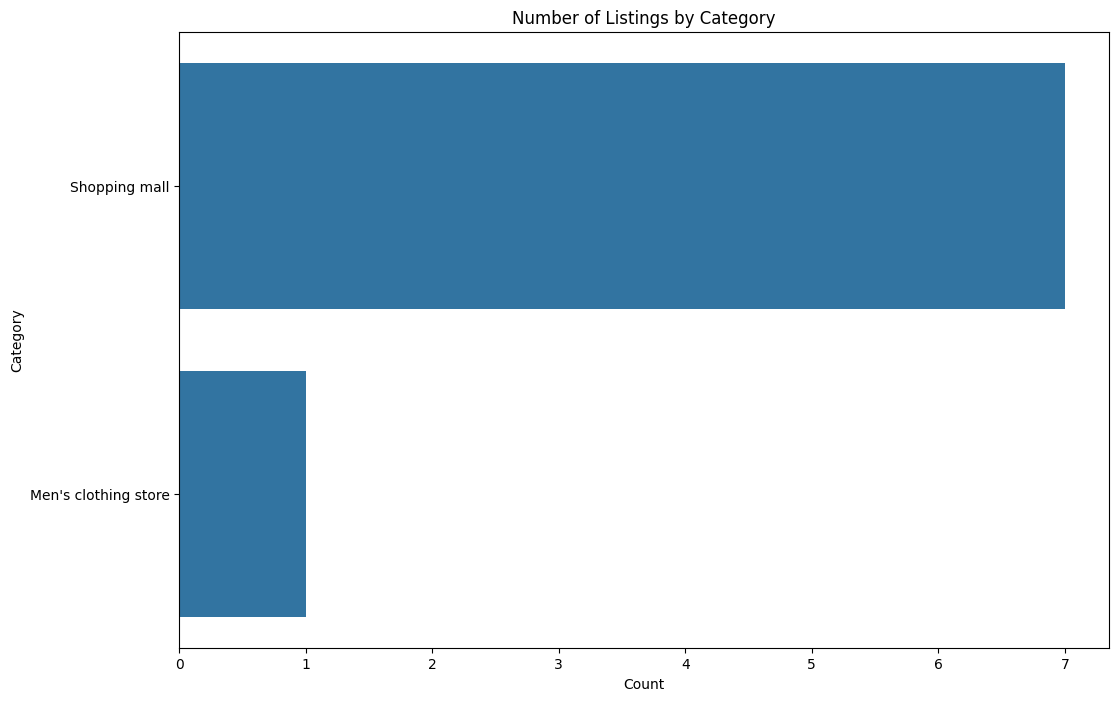

In [48]:
plt.figure(figsize=(12, 8))
sns.countplot(y='categoryName', data=Gmap, order=Gmap['categoryName'].value_counts().index)
plt.title('Number of Listings by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

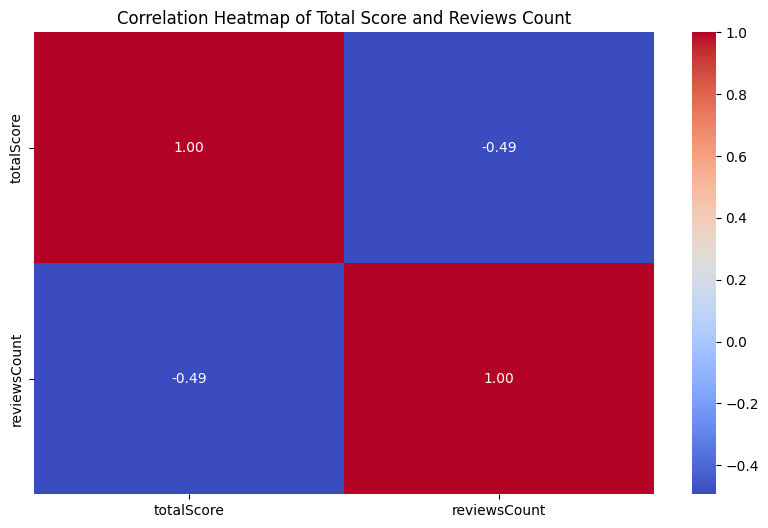

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(Gmap[['totalScore', 'reviewsCount']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Total Score and Reviews Count')
plt.show()